In [ ]:
!pip install segmentation-models
#!pip install tensorflow==2.5.0
#!pip install keras==2.3.1
#!pip install "h5py<3.0.0"
#!pip install "scipy>=1.5"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import segmentation_models as sm
import cv2
import os
import numpy as np
import glob
from matplotlib import pyplot as plt

Segmentation Models: using `keras` framework.


In [2]:
len(tf.config.list_physical_devices('GPU'))

1

In [3]:
BACKBONE = "resnet34"
preprocess_input = sm.get_preprocessing(BACKBONE)

In [4]:
SIZE_X = 256
SIZE_Y = 256

train_images = []
train_masks = []

train_num = 0
directory_path = "D:/Users/xmyst/Desktop/FYP Materials/Images//augmented"
image_folder = "aug_images"
mask_folder = "aug_masks"
image_filename_prefix = "augmented_image_"
mask_filename_prefix = "augmented_mask_"

# Get number of images
for item in glob.glob(os.path.join(directory_path, image_folder, "*.png")):
  train_num += 1

In [5]:
# Read each image using cv2.imread() and append it to the list
# Capture image and mask info as a list
for i in range(1, train_num+1):
  img_path = os.path.join(directory_path , image_folder, image_filename_prefix + str(i) + ".png")
  #print(img_path)
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (SIZE_Y, SIZE_X))
  train_images.append(img)

  mask_path = os.path.join(directory_path , mask_folder, mask_filename_prefix + str(i) + ".png")
  mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
  mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
  train_masks.append(mask)

# Convert the lists to array for machine learning processing using np.array()
train_images = np.array(train_images)
train_masks = np.array(train_masks)

In [6]:
train_images.shape

(4000, 256, 256, 3)

In [7]:
train_masks.shape

(4000, 256, 256)

In [8]:
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis=3)

# Train test split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.05, random_state=42)

# Preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)
y_train = y_train/255
y_val = y_val/255

In [9]:
X.shape

(4000, 256, 256, 3)

In [11]:
Y.shape

(4000, 256, 256, 1)

 Intersection over Union, a value used in object detection to measure the overlap of a predicted versus actual bounding box for an object. Value from 0 to 1, higher the score the better. IoU > 0.95 as an excellent score, IoU > 0.7 as a good one, and any other score as the poor one.

In [12]:
# Define model
model = sm.Unet(BACKBONE, encoder_weights="imagenet")
model.compile("Adam", loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

In [13]:
# Fit model
history = model.fit(
                x=x_train,
                y=y_train,
                batch_size=32,
                epochs=150,
                verbose=1,
                validation_data=(x_val, y_val)
            )

Epoch 1/150


ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/stage1_unit2_bn2/FusedBatchNormV3' defined at (most recent call last):
    File "d:\Programming\miniconda3\envs\keras\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "d:\Programming\miniconda3\envs\keras\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
      self.io_loop.start()
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "d:\Programming\miniconda3\envs\keras\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "d:\Programming\miniconda3\envs\keras\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "d:\Programming\miniconda3\envs\keras\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\ipykernel\ipkernel.py", line 345, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 2899, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 3170, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\xmyst\AppData\Local\Temp/ipykernel_15308/3178262880.py", line 8, in <module>
      validation_data=(x_val, y_val)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\eager\def_function.py", line 915, in __call__
      result = self._call(*args, **kwds)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\eager\def_function.py", line 980, in _call
      return self._stateless_fn(*args, **kwds)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\eager\function.py", line 2495, in __call__
      filtered_flat_args) = self._maybe_define_function(args, kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\eager\function.py", line 2760, in _maybe_define_function
      graph_function = self._create_graph_function(args, kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\eager\function.py", line 2679, in _create_graph_function
      capture_by_value=self._capture_by_value),
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1247, in func_graph_from_py_func
      func_outputs = python_func(*func_args, **func_kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\eager\def_function.py", line 677, in wrapped_fn
      out = weak_wrapped_fn().__wrapped__(*args, **kwds)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1229, in autograph_handler
      user_requested=True,
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\distribute\distribute_lib.py", line 1315, in run
      return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\distribute\distribute_lib.py", line 2891, in call_for_each_replica
      return self._call_for_each_replica(fn, args, kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\distribute\distribute_lib.py", line 3692, in _call_for_each_replica
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 661, in _fused_batch_norm
      training, _fused_batch_norm_training, _fused_batch_norm_inference
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\utils\control_flow_util.py", line 109, in smart_cond
      pred, true_fn=true_fn, false_fn=false_fn, name=name
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\framework\smart_cond.py", line 52, in smart_cond
      return true_fn()
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 645, in _fused_batch_norm_training
      exponential_avg_factor=exponential_avg_factor,
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\util\dispatch.py", line 1176, in op_dispatch_handler
      return dispatch_target(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\ops\nn_impl.py", line 1701, in fused_batch_norm
      name=name)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 4509, in fused_batch_norm_v3
      name=name)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 799, in _apply_op_helper
      attrs=attr_protos, op_def=op_def)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\framework\func_graph.py", line 737, in _create_op_internal
      compute_device)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 3808, in _create_op_internal
      op_def=op_def)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 2108, in __init__
      c_op = _create_c_op(g, node_def, inputs, control_input_ops, op_def=op_def)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 1974, in _create_c_op
      tf_stack.extract_stack_for_op(c_op, stacklevel=3)
    File "d:\Programming\miniconda3\envs\keras\lib\site-packages\tensorflow\python\util\tf_stack.py", line 182, in extract_stack_for_op
      _source_filter_stacks[thread_key][-1].internal_set, c_op, stacklevel)
Node: 'model_1/stage1_unit2_bn2/FusedBatchNormV3'
OOM when allocating tensor with shape[32,64,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/stage1_unit2_bn2/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_11031]

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

Plot loss and IoU graph over number of epochs

In [ ]:
# list all data in history
print(history.history.keys())

In [ ]:
fig, ax = plt.subplots(1, 2 ,figsize=(15,10))
ax[0].plot(history.history["loss"])
ax[0].plot(history.history["val_loss"])
ax[0].set_title("Model Loss", fontsize="15")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend(["train", "test"], loc="upper left")

ax[1].plot(history.history["iou_score"])
ax[1].plot(history.history["val_iou_score"])
ax[1].set_title("Model IoU Score", fontsize="15")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("IoU")
ax[1].legend(["train", "test"], loc="upper left")

Using trained model to do prediction

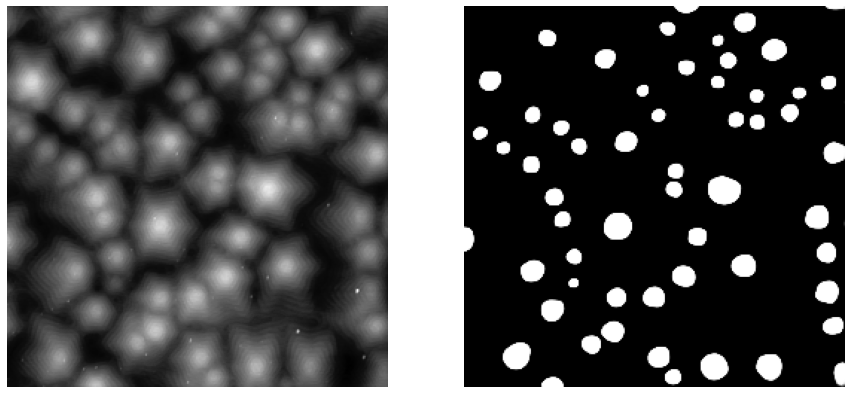

In [ ]:
test_img = cv2.imread("/content/drive/My Drive/Colab Notebooks/Files/FYP/preprocessed_images/V1767CG_T.png", cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (SIZE_Y,SIZE_X))

fig, ax = plt.subplots(1, 2 ,figsize=(15,10))
ax[0].axis("off")
ax[0].imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY), cmap="gray") # cmap="gray" only works on a grayscaled image

test_img = np.expand_dims(test_img, axis=0)
pred_img = model.predict(test_img)
#pred_img = pred_img.reshape((256,256))

ax[1].axis("off")
ax[1].imshow(pred_img[0,:,:,0], cmap="gray")
# Error when the shape is (1,256,256,1) and (256,256,1) as only 2d array is accepted when channel is 1

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Files/FYP/UNetAFM_2.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Reload Model
___

In [ ]:
from tensorflow import keras
import cv2
import numpy as np
from matplotlib import pyplot as plt

SIZE_X = 256
SIZE_Y = 256

model_test = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Files/FYP/UNetAFM.h5", compile=False)

1/1 [==============================] - 2s 2s/step


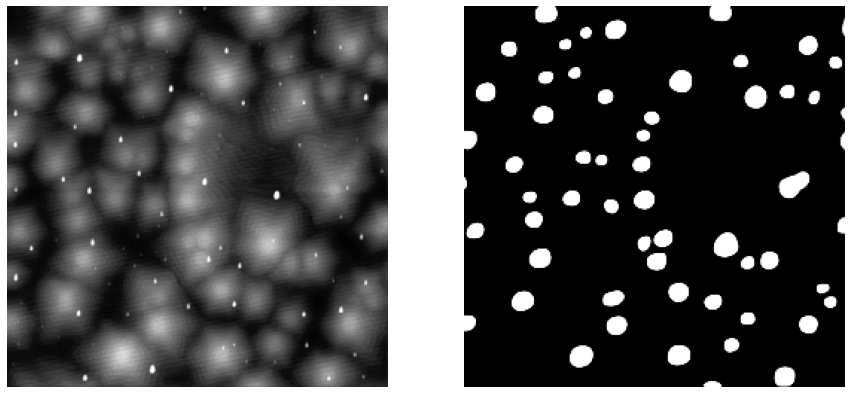

In [ ]:
test_img = cv2.imread("/content/drive/My Drive/Colab Notebooks/Files/FYP/preprocessed_images/V1760CG_T.png", cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (SIZE_Y,SIZE_X))

fig, ax = plt.subplots(1, 2 ,figsize=(15,10))
ax[0].axis("off")
ax[0].imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY), cmap="gray")

test_img = np.expand_dims(test_img, axis=0)
pred_img = model_test.predict(test_img)
pred_img = pred_img.reshape((256,256))

ax[1].axis("off")
ax[1].imshow(pred_img, cmap="gray")

The predicted image has pixel intensity range of (0,1)

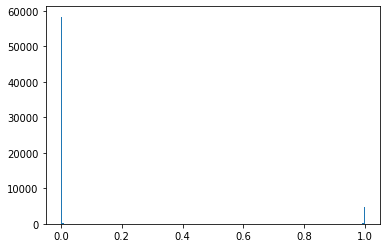

In [ ]:
plt.hist(pred_img.ravel(), bins=256);

Convert the pixel intensity range to from (0,1) -> (0,255)

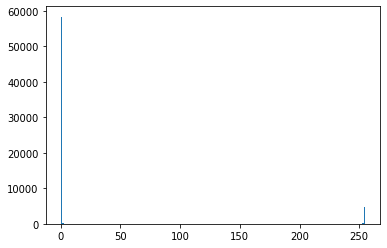

In [ ]:
pred_img = 255 * pred_img
plt.hist(pred_img.ravel(), bins=256);

pred_img = pred_img.astype(np.uint8)

Thresholding to ensure that pixel value is either 0 or 255

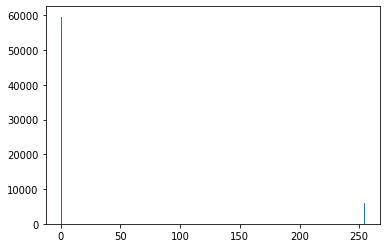

In [ ]:
thresh_val, thresh_pred_img = cv2.threshold(pred_img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)
plt.hist(thresh_pred_img.ravel(), bins=256);

Detect objects using cv2.connectedComponentsWithStats()

In [ ]:
# Choose between 4 or 8 for connectivity type
connectivity = 4

# num_labels is the number of detected objects including the background
# labels is an image showing the detected objects
# stats[label_index, COLUMN] is an array of (leftmost, topmost, width, height, area) of bounding box for each label
#   COLUMN can be cv2.CC_STAT_LEFT, cv2.CC_STAT_TOP, cv2.CC_STAT_WIDTH, cv2.CC_STAT_HEIGHT, cv2.CC_STAT_AREA
# centroid is an array of center coordinates for each label
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh_pred_img, connectivity, cv2.CV_32S)

Drawing bounding circles in the original image

In [ ]:
img_bounds = test_img.reshape((256,256,3))
img_bounds = cv2.cvtColor(img_bounds, cv2.COLOR_BGR2RGB)
# Green color
color = (0, 255, 0)
# 1px thickness
thickness = 1

for i in range(num_labels-1):
  # cv2.circle(image, center_coordinates, radius, color, thickness)
  center_coor = [int(i) for i in centroids[i+1].tolist()]
  cv2.circle(img_bounds, center_coor, stats[i+1, cv2.CC_STAT_WIDTH], color, thickness)

Number of defects detected: 59


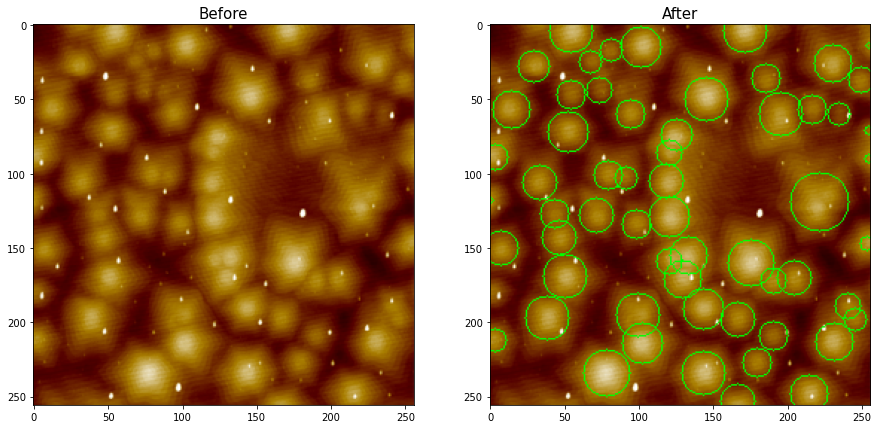

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(cv2.cvtColor(test_img.reshape((256,256,3)), cv2.COLOR_BGR2RGB))
ax[0].set_title("Before", fontsize="15")
ax[1].imshow(img_bounds)
ax[1].set_title("After", fontsize="15")
print(f"Number of defects detected: {num_labels-1}")